In [1]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions: 
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [2]:
%reload_ext autoreload
%autoreload 2

import sys 
import pyspark

from pyspark.sql import SQLContext

app_name = "example-logs"
master = "local[*]"
conf = pyspark.SparkConf().setAppName(app_name).setMaster(master)
sc = pyspark.SparkContext(conf=conf)
sqlContext = SQLContext(sc)

# DAMLAS - Machine Learning At Scale
## Assignment - HW3
Data Analytics and Machine Learning at Scale
Target, Minneapolis

---
__Name:__  Martial Diby

__Class:__ DAMLAS (Section Summer 2016 - TARGET, e.g., Summer 2016)     

__Email:__  martial.diby2@Target.com    

__Week:__   03

# Table of Contents <a name="TOC"></a> 

1.  [HW Introduction](#1)   
2.  [HW References](#2)
3.  [HW Problems](#3)   
    3.0.  [Short Answer Questions](#HW3.0)    
    3.1.  [Word Count plus sorting](#HW3.1)   
    3.2.  [MLlib-centric Kmeans](#HW3.2)    
    3.3.  [Homegrown KMeans in Spark](#HW3.3)    
    3.4.  [Making Homegrown KMeans more efficient](#HW3.4)  
    3.5.  [OPTIONAL Weighted KMeans](#HW3.5)  
    3.6.  [OPTIONAL Linear Regression](#HW3.6)  
    3.7.  [OPTIONAL Error surfaces](#HW3.7)



<a name="1">
# 1 Instructions
[Back to Table of Contents](#TOC)
* Homework submissions are due by Tueday, 08/02/2016 at 11AM (CT).


* Prepare a single Jupyter note, please include questions, and question numbers in the questions and in the responses.
Submit your homework notebook via the following form:

   + [Submission Link - Google Form](http://goo.gl/forms/er3OFr5eCMWDngB72)


### Documents:
* IPython Notebook, published and viewable online.
* PDF export of IPython Notebook.
    
<a name="2">
# 2 Useful References
[Back to Table of Contents](#TOC)

* Karau, Holden, Konwinski, Andy, Wendell, Patrick, & Zaharia, Matei. (2015). Learning Spark: Lightning-fast big data analysis. Sebastopol, CA: O’Reilly Publishers.
* Hastie, Trevor, Tibshirani, Robert, & Friedman, Jerome. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Stanford, CA: Springer Science+Business Media. __(Download for free [here](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf))__
* Ryza, Sandy, Laserson, Uri, Owen, Sean, & Wills, Josh. (2015). Advanced analytics with Spark: Patterns for learning from data at scale. Sebastopol, CA: O’Reilly Publishers.
---
* [Slides for Supervised-ML-Classification-via-GradientDescent](https://www.dropbox.com/s/uzoch1dwft8kaqw/Lecture-15-Supervised-ML-Classification-via-GradientDescent.pdf?dl=0)
* [Slides from High Entropy Friday]( https://www.dropbox.com/s/0dlvsff3660vvbk/Lecture-High-Entropy-Friday.pdf?dl=0)

---

<a name="HW3">
# 3 HW Problems
[Back to Table of Contents](#TOC)

<a name="3.0"></a><h2 style="color:darkblue"> HW3.0: Short answer questions </h2>
[Back to Table of Contents](#TOC)


__What is Apache Spark and how is it different to Apache Hadoop? __

Spark is one of the emerging platforms and Apache Top Level Project right now. It gives more power than MapReduce/Hadoop. Spark is basically develop to overcome MapReduce's shortcoming that it is not optimized for of iterative algorithms and interactive data analysis which performs cyclic operations on same set of data. For this Spark depends on Resilient Distributed Datasets (RDDs) as a base unit.
Some of the difference in details are:
Faster: Spark execute batch processing jobs , about 10 to 100 times faster than the Hadoop MapReduce framework by making the use of in-memory processing compared to persistence storage used by Hadoop.
Spark is a Swiss army knife of analytics world: With Spark, we can use the build-in libraries to perform Batch Processing, Streaming, Machine Learning and Interactive SQL queries in a single cluster unlike Hadoop which only provides Batch Processing at the core.
Caching: One of the reason of Spark being extremely fast is by making use of caching and in-memory processing and Hadoop on the other hand is completely disk dependent.
Iterative computations: One of the main aims for building Spark was iterative computations in use cases like machine learning when computation need to be performed multiple times on same set of data.

__Fill in the blanks:
Spark API consists of interfaces to develop applications based on it in Java, __ Scala, Python __ languages (list languages). There is also SparkR for R support. __

<hr>

__Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or __ Yarn __ in a distributed manner. __

<hr>

__What is an RDD and show a fun example of creating one and bringing the first element back to the driver program. __

RDD = Resilient Distributed Dataset = immutable distributed collection of objects. 

<hr>


<a name="HW3.1"> <h2 style="color:darkgreen">HW3.1 WordCount plus sorting </h2>
[Back to Table of Contents](#TOC)

The following notebooks will be useful to jumpstart this collection of Homework exercises:


* [Example Notebook with Debugging tactics in Spark](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/jqjllp8kmf1eolk/WordCountDebugging-Example.ipynb)
* [Word Count Quiz](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/vgmpivsi4rvqz0s/WordCountQuiz.ipynb)
* [Work Count Solution](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/dxv3dmp1vluuo8i/WordCountQuiz-Solution.ipynb)

---
In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document (with no solutions in it) as a the example document to run an experiment.  Report the following: 
* provide a sorted list of tokens in decreasing order of frequency of occurence limited to [top 20 most frequent only] and [bottom 10 least frequent]. 


__OPTIONAL__ 
Feel free to do a secondary sort where words with the same frequncy are sorted alphanumerically increasing. Plseas refer to the [following notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/uu5afr3ufpm9fy8/SecondarySort.ipynb)
 for examples of secondary sorts in Spark. Please provide the following [top 20 most frequent terms only] and [bottom 10 least frequent terms]

__NOTE__ [Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]__

In [6]:
def remove_punctuation(text):
    """
    Removes punctuation, and strips leading and trailing spaces.
    """
    return re.sub('[^A-Za-z0-9]+', ' ', text.strip().encode('utf8'))

def is_valid_word(word):
    """
    Return True or False on if this is a word I want included
    """
    try:
        int(word)
        return False
    except:
        return True

In [7]:
import re

counts = sc.textFile('HW3_WordCount_text.txt') \
        .map(remove_punctuation) \
        .map(lambda x: x.lower()) \
        .flatMap(lambda x: x.split()) \
        .filter(is_valid_word) \
        .map(lambda x: (x, 1)) \
        .reduceByKey(lambda x, y: x + y) \
        .map(lambda x:(x[1], x[0])) \
        .sortByKey(False)

word_counts = counts.collect()
    
print('Most frequent 20 words: ', word_counts[:20])
print('Least frequent 10 words: ', word_counts[len(word_counts) - 10:])


### Need to add in the secondary sort

('Most frequent 20 words: ', [(75, 'the'), (50, 'of'), (40, 'and'), (34, 'in'), (33, 'to'), (26, 'a'), (23, 'kmeans'), (22, 'data'), (21, 'code'), (19, 'hw3'), (18, 'here'), (17, 'for'), (17, 'with'), (17, 'this'), (17, 'contents'), (17, 'table'), (17, 'back'), (15, 'notebook'), (14, 'as'), (14, 'plot')])
('Least frequent 10 words: ', [(1, 'assignment'), (1, 'user'), (1, 'jumpstart'), (1, 'class'), (1, 'possibly'), (1, 'look'), (1, 'uri'), (1, 'element'), (1, 'patterns'), (1, 'left')])


<a name="HW3.1.1"><h2 style="color:darkgreen">HW3.1.1 </h2>
[Back to Table of Contents](#TOC)

Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.


In [8]:
import re

counts2 = sc.textFile('HW3_WordCount_text.txt') \
        .map(remove_punctuation) \
        .flatMap(lambda line: re.findall(r'\b[a-z]\w+\b', line)) \
        .filter(is_valid_word) \
        .map(lambda x: (x, 1)) \
        .reduceByKey(lambda x, y: x + y) \
        .map(lambda x:(x[1], x[0])) \
        .sortByKey(False)

word_counts2 = counts2.collect()
    
print('Most frequent 20 words: ', word_counts2[:20])
print('Least frequent 10 words: ', word_counts2[len(word_counts2) - 10:])

('Most frequent 20 words: ', [(71, 'the'), (49, 'of'), (40, 'and'), (33, 'to'), (32, 'in'), (20, 'data'), (17, 'for'), (17, 'with'), (17, 'this'), (14, 'as'), (12, 'here'), (12, 'model'), (12, 'code'), (12, 'plot'), (12, 'notebook'), (10, 'is'), (9, 'goes'), (9, 'clusters'), (9, 'space'), (8, 'your')])
('Least frequent 10 words: ', [(1, 'online'), (1, 'such'), (1, 'two'), (1, 'initializationMode'), (1, 'github'), (1, 'possibly'), (1, 'element'), (1, 'graphs'), (1, 'first'), (1, 'left')])


<a name="HW3.2"> <h2 style="color:darkblue"> HW3.2: MLlib-centric KMeans</h2>
[Back to Table of Contents](#TOC)

Using the following  MLlib-centric KMeans code snippet: 

<pre>
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt


# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
clusters.save(sc, "myModelPath")
sameModel = KMeansModel.load(sc, "myModelPath")

</pre>

__NOTE__ <p> The  __kmeans_data.txt__ is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 

__TASKS__
* Run this code snippet and list the clusters that your find.
* compute the Within Set Sum of Squared Errors for the found clusters. Comment on your findings.

In [9]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt
import shutil
import os

# Checks to see if myModelPath exists and if so deletes it (allows running cell multiple times w/o errors)
if os.path.exists('myModelPath') == True:
    shutil.rmtree('myModelPath')

data = sc.textFile("kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
WCSS = clusters.computeCost(parsedData)

print("WSSSE = " + str(WSSSE))
print("WCSS " + str(WCSS)) 
print("Centroids: " + str(clusters.centers))

# Save and load model
clusters.save(sc, "myModelPath")
sameModel = KMeansModel.load(sc, "myModelPath")

/usr/local/spark/python/pyspark/mllib/clustering.py:176: UserWarning: Support for runs is deprecated in 1.6.0. This param will have no effect in 1.7.0.
  "Support for runs is deprecated in 1.6.0. This param will have no effect in 1.7.0.")


WSSSE = 0.692820323028
WCSS 0.12
Centroids: [array([ 9.1,  9.1,  9.1]), array([ 0.1,  0.1,  0.1])]


<a name="HW3.3"><h2 style="color:darkgreen"> HW3.3: Homegrown KMeans in Spark </h2>
[Back to Table of Contents](#TOC)

Download the following KMeans [notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb).

Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.
Then run MLlib's Kmean implementation on this data  and report your results as follows:

* plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
* in each plot please report the Within Set Sum of Squared Errors for the found clusters (as part of the title WSSSE). Comment on the progress of this measure as  the KMEans algorithms runs for more iterations. Then plot the WSSSE as a function of the iteration (1, 10, 20, 30, 40, 50, 100).



In [ ]:
 %matplotlib inline
    
import numpy as np
import pylab 
import json

size1 = size2 = size3 = 100

samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data, samples2, axis = 0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data, samples3, axis= 0)

# Randomlize data
data = data[np.random.permutation(size1 + size2 + size3),]
np.savetxt('data.csv', data, delimiter = ',')

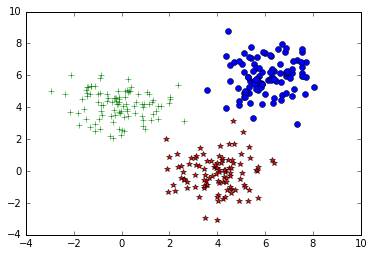

In [11]:
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

In [12]:
# plot centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1], '.', color = 'blue')
    pylab.plot(means[0][0], means[0][1], '*', markersize =10, color = 'red')
    pylab.plot(means[1][0], means[1][1], '*', markersize =10, color = 'red')
    pylab.plot(means[2][0], means[2][1], '*', markersize =10, color = 'red')
    pylab.show()

<a name="HW3.4"><h2 style="color:darkblue"> HW3.4: KMeans Experiments  </h2>
[Back to Table of Contents](#TOC)

Using this provided [homegrown Kmeans code](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb)   repeat the experiments in HW3.3. Explain any differences between the results in HW3.3 and HW3.4. 

In [14]:
import numpy as np

def nearest_centroid_hg(centroids_hg, line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_hg = np.sum((x - centroids_hg)**2, axis = 1).argmin()
    return (closest_centroid_hg, (x, 1))

def error_hg(centroids_hg, line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_hg = np.sum((x - centroids_hg)**2, axis = 1).argmin()
    error_hg = sqrt(np.sum((x - centroids_hg[closest_centroid_hg])**2))
    return (closest_centroid_hg, error_hg)

<a name="HW3.4.1"><h2 style="color:darkblue"> HW3.4.1: Making Homegrown KMeans more efficient  </h2>
[Back to Table of Contents](#TOC)

The above provided homegrown KMeans implentation in not the most efficient. How can you make it more efficient? Make this change in the code and show it work and comment on the gains you achieve. 

### HINT: have a look at  [this linear regression notebook](    http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb)

Iteration: 1
WSSSE = 1104.01969504
Centroids: [[ 0.81650825  0.58066731]
 [ 4.16913467  2.66769974]
 [ 1.4722266   5.57104213]]


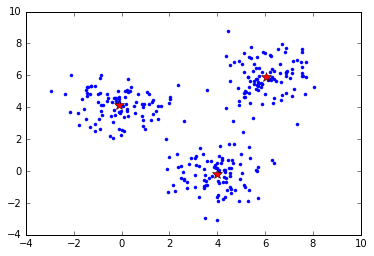

Iteration: 10
WSSSE = 378.293231259
Centroids: [[ 3.97673796 -0.19593348]
 [ 6.04398065  5.88121502]
 [-0.10619712  4.11557952]]


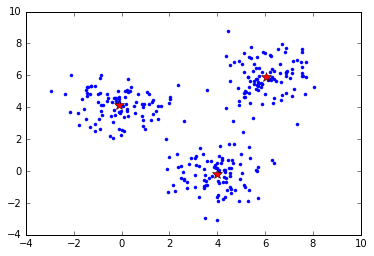

Iteration: 20
WSSSE = 378.293231259
Centroids: [[ 3.97673796 -0.19593348]
 [ 6.04398065  5.88121502]
 [-0.10619712  4.11557952]]


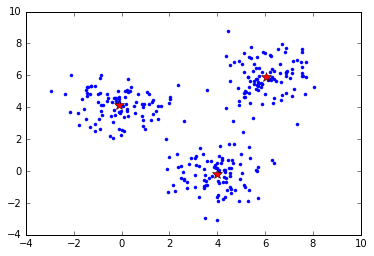

Iteration: 100
WSSSE = 378.293231259
Centroids: [[ 3.97673796 -0.19593348]
 [ 6.04398065  5.88121502]
 [-0.10619712  4.11557952]]


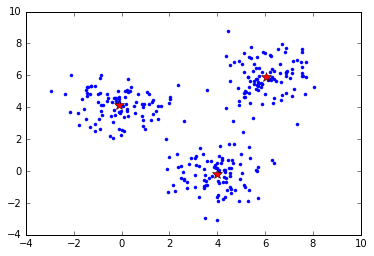

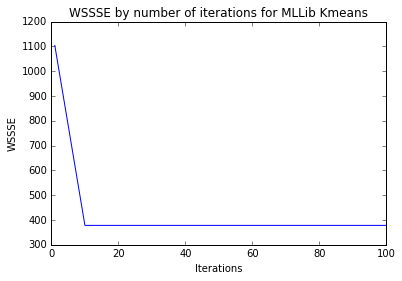

27.1007490158 seconds


In [16]:
from timeit import default_timer as timer

start = timer()

centroids_hg = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

WSSSE_report = []
iterations = [1, 10, 20, 30, 40, 50, 100]

data = sc.textFile("data.csv").cache()

for i in range(100):
    centroids_hg_broadcast = sc.broadcast(centroids_hg)
    iteration = i + 1
    nearest_centroid_bound = partial(nearest_centroid_hg, centroids_hg_broadcast.value)
    error_bound = partial(error_hg, centroids_hg_broadcast.value)
    res = data.map(nearest_centroid_bound).reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1])).collect()
    res = sorted(res, key = lambda x : x[0])  #sort based on clusted ID
    centroids_new_hg = np.array([x[1][0] / x[1][1] for x in res])  #divide by cluster size
    centroids_hg = centroids_new_hg
    WSSSE_hg = data.map(error_bound).reduceByKey(lambda x, y: x + y).collect()
    
    sum_WSSSE = 0
    
    for WSSSE in WSSSE_hg:
        sum_WSSSE += WSSSE[1]
    
    if iteration in [1, 10, 20, 100]:
        print("Iteration: " + str(iteration))
        print("WSSSE = " + str(sum_WSSSE))
        print("Centroids: " + str(centroids_hg))
        plot_iteration(clusters.centers)
    
    if iteration in iterations:
        WSSSE_report.append(sum_WSSSE)
        
plt.plot(iterations, WSSSE_report)
plt.title("WSSSE by number of iterations for MLLib Kmeans")
plt.xlabel("Iterations")
plt.ylabel("WSSSE")
plt.show()

end = timer()

print(str(end - start) + " seconds" )

<a name="HW3.5"><h2 style="color:darkgreen"> HW3.5: OPTIONAL Weighted KMeans  </h2>
[Back to Table of Contents](#TOC)

Using this provided [homegrown Kmeans code](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb), modify it to do a weighted KMeans and repeat the experiements in HW3.3. Explain  any differences between the results in HW3.3 and HW3.5.

NOTE: Weight each example as follows using the inverse vector length (Euclidean norm): 

> weight(X)= 1/||X||, 

where ||X|| = SQRT(X.X)= SQRT(X1^2 + X2^2)

Here X is vector made up of two values X1 and X2.

__[Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]__

<a name="HW3.6"><h2 style="color:darkblue"> HW3.6 OPTIONAL Linear Regression</h2>
[Back to Table of Contents](#TOC)
<a name="HW3.6.1"><h2 style="color:darkblue"> HW3.6.1 OPTIONAL Linear Regression</h2>
[Back to Table of Contents](#TOC)

Using [this linear regression notebook](    http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb):


* Generate 2 sets of data with 100 data points using the data generation code provided and plot each in separate plots. Call one the training set and the other the testing set.

* Using MLLib's LinearRegressionWithSGD train up a linear regression model with the training dataset and evaluate with the testing set. What a good number of iterations for training the linear regression model? Justify with plots (e.g., plot MSE as a function of the number of iterations) and words. 


<a name="HW3.6.2"><h2 style="color:darkblue"> HW3.6.2 OPTIONAL Linear Regression</h2>
[Back to Table of Contents](#TOC)

In the notebook provided above, in the cell labeled "Gradient descent (regularization)".

* Fill in the blanks and get this code to work for LASS0 and RIDGE linear regression.

* Using the data from 3.6.1 tune the hyper parameters of your LASS0 and RIDGE regression. Report your findings with words and plots.

<a name="HW3.7"><h2 style="color:darkgreen"> HW3.7 OPTIONAL Error surfaces </h2>
[Back to Table of Contents](#TOC)

Here is a link to R code with 1 test drivers that plots the linear regression model in  model space and in the domain space:

> https://www.dropbox.com/s/3xc3kwda6d254l5/PlotModelAndDomainSpaces.R?dl=0

Here is a sample output from this script: 
      
> https://www.dropbox.com/s/my3tnhxx7fr5qs0/image%20%281%29.png?dl=0

Please use this as inspiration and code a equivalent error surface and heatmap (with isolines) in Spark and show the trajectory of learning taken during gradient descent(after each n-iterations of Gradient Descent):


Using Spark and  Python (using the above R Script as inspiration), plot the error surface for the linear regression model using a heatmap and contour plot. 
Also plot the current model in the original domain space for every 10th iteration.  Plot them side by side if possible  for each iteration: lefthand side plot is the model space(w0 and w01) and the righthand side plot is domain space (plot the corresponding model and training data in the problem domain space) with a final pair of graphs showing the entire trajectory in the model and domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, MSE on the training data etc.

Also plot the MSE as a function of each iteration (possibly every 10th iteration). Dont forget to label both axis and the graph also. __[Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]__





[Back to Table of Contents](#TOC)
<center><div class='jumbotron'><h2 style='color:green'>-------  END OF HWK 9 --------</h2></div></center>